# Assignment 2: AutoML vs Ensembles in Biochemistry

Traditional Machine Learning Workflow is Data acquisition, Data Exploration, Data Preparation, Feature Engineering, Model Selection, Model Training, Hyper Parameter Tuning and Predictions. Using Automated Machine Learning, the only workflow required is 

There are 3 different types of AutoML that will be tested.

These are HyperOPT, TPOT and SKLearn

From looking at the data I have decided to try and predict Chemical classes using SA scores and to predict Strain based on Strain based on the Compound scores

In [1]:
import pandas as pd
import numpy as np

Read in chemical class

Read in Strain data

In [2]:
strain = pd.read_csv("data/strain.csv")
strain.head(1)

,Strain,Ethyl Acetate,Ethanol,"Propanoic acid, ethyl ester",2-Pentanone,Decane,Methyl Isobutyl Ketone,Amylene hydrate,"Butanoic acid, 2-methyl-, methyl ester",Isobutyl acetate,...,1-Dodecanol,Methyl tetradecanoate,2-Pentadecanone,"Tetradecanoic acid, ethyl ester",Hexadecanal,n-Tridecan-1-ol,1-Tetradecanol,n-Pentadecanol,1-Hexadecanol,Indole
0,SA_A,465374.0,1027715,NaN,1289650,800581,324424.0,73015,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
strain.shape

(84, 68)

### General Data Cleaning

In [3]:
strain.isna().sum().sum()

2699

Due to a lot of null valuesUsing Tr, I will fill all null values with 0

In [3]:
strain = strain.fillna(0)

In [5]:
strain.isna().sum().sum()

0

##### Spltting data into training and test set

I will do an 80/20 split: 80% of the data for training and 20% for testing

In [6]:
strain_train = strain.sample(frac = 0.8)
strain_test = strain.drop(strain_train.index)

strain_train_x = strain_train.drop(["Strain"], axis=1)
strain_train_y = strain_train["Strain"]

strain_test_x = strain_test.drop(["Strain"], axis=1)
strain_test_y = strain_test["Strain"]

### AutoML work

For the AutoML section of this paper I will use the 3 AutoML approaches above and use the results for the best one.

AutoML Baseline

In [26]:
from supervised.automl import AutoML
automl = AutoML(total_time_limit=5*60)
automl.fit(strain_train_x, strain_train_y)

AutoML directory: AutoML_17
The task is multiclass_classification with evaluation metric logloss
AutoML will use algorithms: ['Baseline', 'Linear', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble available models


Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 3 models
1_Baseline logloss 1.791759 trained in 0.37 seconds
2_DecisionTree logloss 0.354287 trained in 19.33 seconds
3_Linear logloss 0.38279 trained in 11.92 seconds
* Step default_algorithms will try to check up to 3 models
4_Default_Xgboost logloss 0.262346 trained in 22.6 seconds
5_Default_NeuralNetwork logloss 0.749168 trained in 1.37 seconds
6_Default_RandomForest logloss 0.69714 trained in 16.16 seconds
* Step ensemble will try to check up to 1 model
Ensemble logloss 0.2505 trained in 0.23 seconds
AutoML fit time: 105.05 seconds
AutoML best model: Ensemble


AutoML(total_time_limit=300)

In [27]:
y_predicted = automl.predict(strain_test_x)

In [28]:
predicted_strain = pd.DataFrame(y_predicted, columns=["PredictedStrain"])
print(pd.DataFrame({"Predicted": predicted_strain["PredictedStrain"], "Target": np.array(strain_test_y)}))

    Predicted  Target
0           1       1
1           1       2
2           1       1
3           1       1
4           2       2
5           3       3
6           3       3
7           4       4
8           5       6
9           6       5
10          5       5
11          6       6
12          6       6
13          5       5
14          6       5
15          6       5
16          6       6


In [33]:
# Accuracy = no correct answers / number of targets
accuracy = 12/17
print(accuracy*100)

70.58823529411765


70.59% accuracy

In [29]:
from supervised.automl import AutoML
automl = AutoML(algorithms=["Decision Tree", "Linear", "Random Forest"],
                total_time_limit=5*60)
automl.fit(strain_train_x, strain_train_y)

AutoML directory: AutoML_18
The task is multiclass_classification with evaluation metric logloss
AutoML will use algorithms: ['Decision Tree', 'Linear', 'Random Forest']
AutoML will ensemble available models


Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 2 models
1_DecisionTree logloss 0.354287 trained in 13.9 seconds
2_Linear logloss 0.38279 trained in 11.87 seconds
* Step default_algorithms will try to check up to 1 model
3_Default_RandomForest logloss 0.693151 trained in 15.96 seconds
* Step ensemble will try to check up to 1 model
Ensemble logloss 0.261314 trained in 0.15 seconds
AutoML fit time: 70.36 seconds
AutoML best model: Ensemble


AutoML(algorithms=['Decision Tree', 'Linear', 'Random Forest'],
       total_time_limit=300)

In [30]:
y_predicted = automl.predict(strain_test_x)

In [31]:
predicted_strain = pd.DataFrame(y_predicted, columns=["PredictedStrain"])
print(pd.DataFrame({"Predicted": predicted_strain["PredictedStrain"], "Target": np.array(strain_test_y)}))

    Predicted  Target
0           1       1
1           2       2
2           1       1
3           1       1
4           2       2
5           3       3
6           3       3
7           4       4
8           5       6
9           6       5
10          5       5
11          6       6
12          6       6
13          6       5
14          6       5
15          5       5
16          6       6


In [38]:
# Accuracy = no correct answers / number of targets
accuracy = 13/17
print(accuracy*100)

76.47058823529412


76.57 % accuracy for predicting strain

#### TPot

For TPot it assumes that data will be in numerical formats. Train_y data and test_y data will needed to be changed.

#### Data Cleaning for TPot AutoML

In [5]:
strain["Strain"].value_counts()

SA_A    15
SA_B    15
PA_A    14
EC_A    14
PA_B    13
EC_B    13
Name: Strain, dtype: int64

In [4]:
strain["Strain"] = strain["Strain"].replace(["SA_A", "SA_B", "PA_A", "PA_B", "EC_A", "EC_B"], [1, 2, 3, 4, 5, 6])

In [9]:
strain["Strain"].value_counts()

1    15
2    15
3    14
5    14
4    13
6    13
Name: Strain, dtype: int64

In [9]:
strain_train = strain.sample(frac = 0.8)
strain_test = strain.drop(strain_train.index)

strain_train_x = strain_train.drop(["Strain"], axis=1)
strain_train_y = strain_train["Strain"]

strain_test_x = strain_test.drop(["Strain"], axis=1)
strain_test_y = strain_test["Strain"]

In [6]:
from tpot import TPOTClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

In [10]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
model = TPOTClassifier(generations=5, population_size=50, cv=cv, scoring='accuracy', verbosity=2, random_state=1, n_jobs=-1)
model.fit(strain_train_x, strain_train_y)

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7873015873015873

Generation 2 - Current best internal CV score: 0.7873015873015873

Generation 3 - Current best internal CV score: 0.7873015873015873

Generation 4 - Current best internal CV score: 0.7912698412698412

Generation 5 - Current best internal CV score: 0.7912698412698412

Best pipeline: LinearSVC(input_matrix, C=0.001, dual=False, loss=squared_hinge, penalty=l1, tol=0.1)


TPOTClassifier(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
               generations=5, n_jobs=-1, population_size=50, random_state=1,
               scoring='accuracy', verbosity=2)

Save for later

TPOTClassifier(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
               generations=5, n_jobs=-1, population_size=50, random_state=1,
               scoring='accuracy', verbosity=2)

In [15]:
model.export('tpot_data_strain.py')

Evaluate final model

In [11]:
model.score(strain_test_x, strain_test_y)

0.9411764705882353

94.11%

In [12]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
strain["Strain"].value_counts()

1    15
2    15
3    14
5    14
4    13
6    13
Name: Strain, dtype: int64

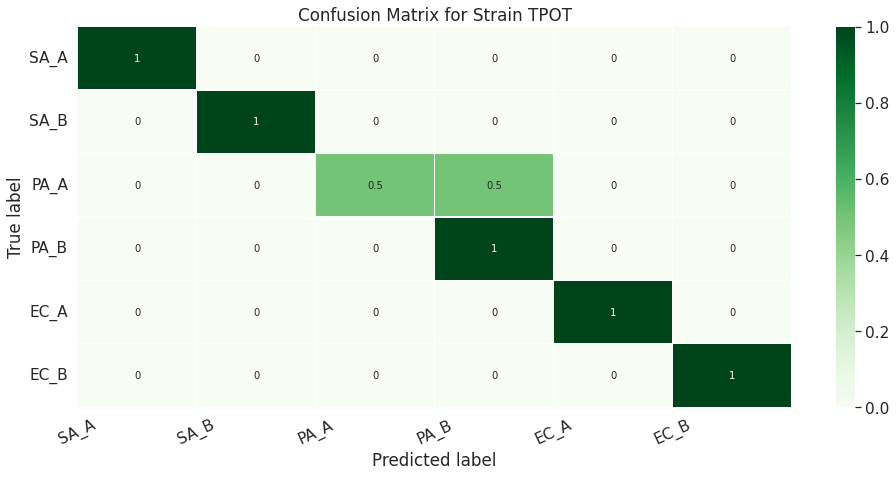

In [14]:
y_pred_strain=model.predict(strain_test_x)

matrix = confusion_matrix(strain_test_y, y_pred_strain)

matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['SA_A', 'SA_B', "PA_A","PA_B", "EC_A", "EC_B"]
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Strain TPOT')
plt.show()

### Random Forest Classifier comparison

In [7]:
strain = pd.read_csv("data/strain.csv")

strain = strain.fillna(0)

In [16]:
strain_train = strain.sample(frac = 0.7)
strain_test = strain.drop(strain_train.index)

strain_train_x = strain_train.drop(["Strain"], axis=1)
strain_train_y = strain_train["Strain"]

strain_test_x = strain_test.drop(["Strain"], axis=1)
strain_test_y = strain_test["Strain"]

In [17]:
from sklearn.ensemble import RandomForestClassifier

Random Forest Classifier for chemical_class

In [18]:
model = RandomForestClassifier()

Random Forest Classifier for strain type

In [19]:
model.fit(strain_train_x, strain_train_y)

RandomForestClassifier()

In [20]:
y_pred_strain=model.predict(strain_test_x)

In [21]:
from sklearn.metrics import accuracy_score

print("Accuracy:",accuracy_score(strain_test_y, y_pred_strain))

Accuracy: 0.7647058823529411


76% for predicting strain type

### Random Forst using cross validation

In [22]:
rfc = RandomForestClassifier()
parameters = {
    "n_estimators":[5,10,50,100,250],
    "max_depth":[2,4,8,16,32,None]
    
}

from sklearn.model_selection import GridSearchCV
chemical = GridSearchCV(rfc,parameters,cv=5)

Display is a function to show the best parameters

Cross Validation for Predicting Strain

In [23]:
strain = GridSearchCV(rfc,parameters,cv=5)

In [24]:
strain.fit(strain_train_x, strain_train_y.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                         'n_estimators': [5, 10, 50, 100, 250]})

In [25]:
display(strain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                         'n_estimators': [5, 10, 50, 100, 250]})

'max_depth': 8, 'n_estimators': 100

### Perform new analysis for best max_depth and best n_estimators

In [34]:
model = RandomForestClassifier()
parameters = {
    "n_estimators":[100],
    "max_depth":[8]
}
cv = GridSearchCV(rfc,parameters,cv=5)

In [35]:
cv.fit(strain_train_x, strain_train_y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [8], 'n_estimators': [100]})

In [36]:
y_pred_strain=cv.predict(strain_test_x)

In [37]:
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(strain_test_y, y_pred_strain))

Accuracy: 0.8823529411764706


88 % Accuracy for Strain Prediction

# See if results for time are any better for predicting strain

Perform all steps again to see if performance can be beaten/ matched

# Perform ML Evaluation for models

Performance review will need to be done for AutoML models and for Random Classifier

Try get another AutoML feature done for comparison

In [29]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [30]:
#confusion_matrix(y_test, y_pred_test)
#print(classification_report(y_test, y_pred_test))